En esta segunda parte del trabajo se pide analizar si es posble agrupar los datos en función de algún criterio. Usaremos el algoritmo de K-Means.

Importamos las librerias:

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Otras librerías
import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.cluster import KMeans
from pyclustertend import hopkins

## Agrupamiento

En este tipo de problemas se trata de agrupar los datos. Agruparlos de tal
forma que queden definidos N conjuntos distinguibles, aunque no
necesariamente se sepa qué signifiquen esos conjuntos.
El agrupamiento siempre será por características similares.
En esta ocasión se nos pide analizar si es posible agrupar los datos en función de algún criterio utilizando el algoritmo K-Means


#### Algoritmo de K-Means

- PASO 1: Elegir la cantidad de clusters $k$
- PASO 2: Elige al azar un centroide para cada clúster (no necesariamente un punto del data set)
- PASO 3: El algoritmo asigna cada punto al centroide más cercano para obtener clústeres iniciales
- PASO 4: Para cada clúster, el algoritmo recalcula el centroide mediante el promedio de todos los puntos del clúster
- PASO 5: K-Means vuelve a reasignar los puntos usando los nuevos centroides. Calcula nuevos
grupos
- PASO 6: El algoritmo repite el cálculo de los centroides y la asignación de puntos hasta que estos dejen de cambiar de clúster

Importamos de vuelta la database despues del preprocesamiento

In [19]:
ds_properati = pd.read_csv('nueva_database_properati.csv')    

#### Cómo determinar la tendencia al agrupamiento

La estadística de Hopkins (Lawson y Jurs 1990) se utiliza para evaluar la tendencia de agrupación de un
conjunto de datos midiendo la probabilidad de que un conjunto de datos dado sea generado por una
distribución de datos uniforme.
En otras palabras, prueba la aleatoriedad espacial de los datos.
La idea es comparar una muestra cualquiera con una muestra uniforme (creada de forma aleatoria) y ver
cómo se distribuyen los ejemplos (los puntos) en dicho espacio.

Funcionamiento: Sea D un conjunto de datos reales:
- PASO 1: Tomar una muestra uniformemente de n puntos $(p_1,..., p_n)$ de D
- PASO 2: Calcular la distancia ($x_i$) de cada punto real a cada vecino más cercano
- PASO 3: Generar un conjunto de datos simulados (randomD) extraído de una distribución uniforme aleatoria con n puntos ($q_1,...,q_n$) y la misma variación que el conjunto de datos reales original D
- PASO 4: Calcular la distancia ($y_i$) desde cada punto artificial hasta el punto de datos real más cercano
- PASO 5: Calcular la estadística de Hopkins (H) como: la distancia media del vecino más cercano en el conjunto de datos
aleatorios dividida por la suma de las distancias medias del vecino más cercano en el conjunto de datos real y simulado.

$H = \frac{\sum_{i=1}^{n} y_i}{\sum_{i=1}^{n} y_i+\sum_{i=1}^{n} x_i}$

Si D está distribuida de forma uniforme, entonces ∑ xi y ∑ yi serían muy parecidos, entonces H sería aproximadamente 1⁄2 (0.5).

Pero si hay clústeres en D, las distancias de los puntos artificiales ∑ yi serían mucho más grandes que las distancias de los puntos reales: ∑ xi y por lo tanto H sería mayor que 0.5.

Un valor de H superior a 0,75 indica una tendencia a la agrupación en un nivel de confianza del 90 %.

Importamos las librerias necesarias:

In [ ]:
!pip install llvmlite --ignore-installed

!pip install pyclustertend
from pyclustertend import hopkins
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.cluster import KMeans

Analizamos la tendencia al clustering del dataset:

In [32]:
ds_properati.head()

,created_on,latitud,longitud,provincia,ciudad,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency
0,2021-09-09,-34.637319,-58.361124,Capital Federal,BOCA,Venta,Departamento,3.0,2.0,58.000000,55.0,82900.0,USD
1,2021-09-09,-34.628647,-58.361871,Capital Federal,BOCA,Venta,Departamento,4.0,3.0,70.000000,70.0,99000.0,USD
2,2021-09-09,-34.610027,-58.401934,Capital Federal,ONCE,Venta,Departamento,4.0,2.0,107.633408,104.0,146000.0,USD
3,2021-09-09,-34.631621,-58.416825,Capital Federal,BOEDO,Venta,PH,4.0,2.0,107.633408,73.0,250000.0,USD
4,2021-09-09,-34.623886,-58.412746,Capital Federal,BOEDO,Venta,PH,2.0,1.0,61.000000,46.0,100000.0,USD


In [ ]:
ds_properati.drop(columns=['Unnamed: 0'], inplace=True)

In [34]:

ds_properati_numerico = ds_properati.select_dtypes(include=np.number)
hopkins(ds_properati_numerico,ds_properati_numerico.shape[0])

0.005974070935021522

A partir de este valor po



A value close to 1 tends to indicate the data is highly clustered, random data will tend to result in values around 0.5, and uniformly distributed data will tend to result in values close to 0

#### ¿Cuántos conjuntos elegir?

Las métricas mas extendidas en clustering son el método de Elbow y el Índice de Silueta.

El método de Elbow consiste básicamente en verificar la evolución de la suma de los cuadrados del error para varias cantidades de clusters y verificar cual es el que brinda un mejor agrupamiento. En donde el gráfico presenta un "codo" (se quiebra la pendiente) es la cantidad de clusters adecuada.

Co- eficiente de Silhouette: Ca

    Cada punto en el conjunto de datos tiene un coeficiente de Silhouette.
    Para calcular este coeficiente necesitamos calcular a(i) y b(i):

    a(i) es la distancia promedio del punto i a cada uno de los puntos de su cluster.

    b(i) es la distancia promedio del punto i a cada uno de los puntos del cluster más cercano a su propio cluster.

    Si a(i) > b(i), i está posiblemente mal clasificado.

    s(i) = b(i) - a(i) / El mayor de (b(i) o a(i))

    En el peor de los casos s(i) es -1. 

Primero verificamos con el metodo de Elbow.
Primero corremos el algoritmo de kmeans entre 2 y 14 grupos y analizamos su error

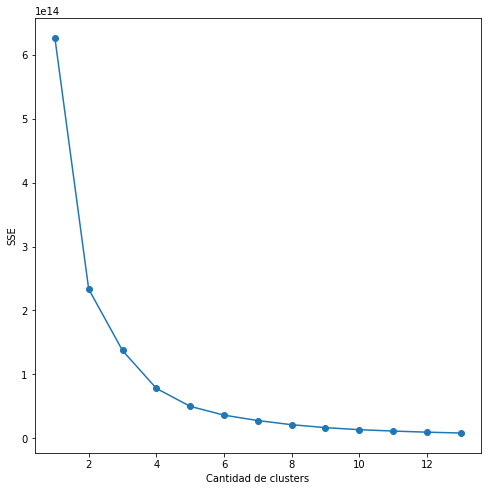

In [35]:
sse = []
list_k = list(range(1, 14))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(ds_properati_numerico)
    sse.append(km.inertia_)

# Grafico el SSE por K
plt.figure(figsize=(8, 8))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Cantidad de clusters')
plt.ylabel('SSE')
plt.show()

Podemos observar que para 4 clusters el grafico se quiebra, por lo que adoptaremos esa cantidad de clusters

#### Analisis Silhouette

Ahora veremos la calidad de los clusters utilizando un analisis de Silhouette

In [36]:
from sklearn.metrics import silhouette_score

list_k = list(range(2, 6))

for n_clusters in list_k:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(ds_properati_numerico)
    score = silhouette_score (ds_properati_numerico, preds)
    print ("For n_clusters =" + str(n_clusters) + " silhouette score is " + str(score))

For n_clusters =2 silhouette score is 0.6469539428407729


KeyboardInterrupt: 